<a href="https://colab.research.google.com/github/cookieeyoung/ML-project1/blob/main/EDA(2)_%EC%A3%BC%EC%97%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# 라이브러리 로드
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# 불필요한 경고문 생략(선택)
import warnings
warnings.filterwarnings('ignore')

# 모든 컬럼 출력설정(선택)
pd.set_option('display.max_columns', None)

# 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/심화프로젝트 ML/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [7]:
#결측치 제거
not_null_data = df.dropna()
not_null_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [8]:
#중복값제거
new_data = not_null_data.drop_duplicates()
new_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39.0,5,0.00,2,1.0,0.0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35.0,10,57369.61,1,1.0,1.0,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1


In [9]:
#인코딩
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
oe = OneHotEncoder()

df = new_data

In [10]:
#label인코딩-성별

le.fit(df['Gender'])

LabelEncoder()

In [11]:
le.classes_

array(['Female', 'Male'], dtype=object)

In [12]:
df['Gender_le'] = le.transform(df['Gender'])

In [13]:
oe.fit(df[['Geography']])

OneHotEncoder()

In [14]:
Geo_csr = oe.transform(df[['Geography']])
Geo_csr_df = pd.DataFrame(Geo_csr.toarray(),columns = oe.get_feature_names_out())
Geo_csr_df

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9991,1.0,0.0,0.0
9992,1.0,0.0,0.0
9993,1.0,0.0,0.0
9994,0.0,1.0,0.0


In [15]:
pd.concat([new_data,Geo_csr_df], axis=1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_le,Geography_France,Geography_Germany,Geography_Spain
0,1.0,15634602.0,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,1.0,0.0,0.0
1,2.0,15647311.0,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,0.0,0.0,1.0
2,3.0,15619304.0,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,1.0,0.0,0.0
3,4.0,15701354.0,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,1.0,0.0,0.0
5,6.0,15574012.0,Chu,645.0,Spain,Male,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10000,10000.0,15628319.0,Walker,792.0,France,Female,28.0,4.0,130142.79,1.0,1.0,0.0,38190.78,0.0,0.0,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0


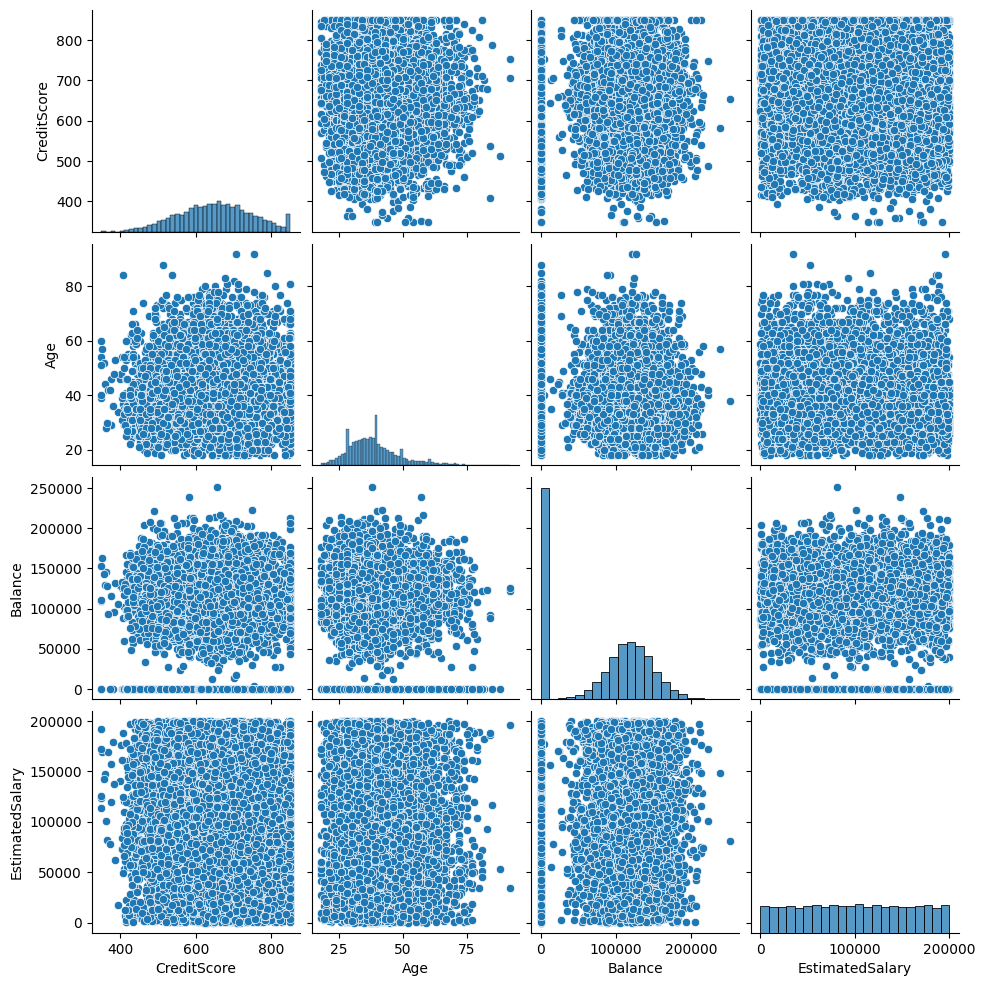

In [16]:
sns.pairplot(new_data[['CreditScore','Age','Balance','EstimatedSalary']])

In [17]:
#데이터 표준화(stdard:이상치없을때,분포 치우쳐져있을때 유용, 표준화 통해 이상치 먼저 제거),정규화(mm:상대적 크기에 대한 영향력 줄임)

from sklearn.preprocessing import MinMaxScaler, StandardScaler
mm_sc = MinMaxScaler()
sd_sc = StandardScaler()

df = new_data
#표준화 sd - age, CreditScore, Balance
#정규화 mm - EstimatedSalary
df['Age_sd_sc'] = sd_sc.fit_transform(df[['Age']])
df['Age_sd_sc']

,Age_sd_sc
0,0.293570
1,0.198222
2,0.293570
3,0.007526
5,0.484266
...,...
9995,0.007526
9996,-0.373866
9997,-0.278518
9998,0.293570


In [18]:
df['Crd_sd_sc'] = sd_sc.fit_transform(df[['CreditScore']])
df['Crd_sd_sc']

,Crd_sd_sc
0,-0.326054
1,-0.439902
2,-1.536986
3,0.501933
5,-0.056958
...,...
9995,1.247122
9996,-1.392088
9997,0.605432
9998,1.257472


In [19]:
df['Bal_sd_sc'] = sd_sc.fit_transform(df[['Balance']])
df['Bal_sd_sc']

,Bal_sd_sc
0,-1.225699
1,0.117505
2,1.333214
3,-1.225699
5,0.597486
...,...
9995,-1.225699
9996,-0.306226
9997,-1.225699
9998,-0.022453


In [20]:
df['Sal_mm_sc'] = mm_sc.fit_transform(df[['EstimatedSalary']])
df['Sal_mm_sc']

,Sal_mm_sc
0,0.506735
1,0.562709
2,0.569654
3,0.469120
5,0.748797
...,...
9995,0.481341
9996,0.508490
9997,0.210390
9998,0.464429


In [21]:
#데이터 분리
from sklearn.model_selection import train_test_split
X = df.drop('Exited', axis = 1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, shuffle =True, random_state = 42, stratify =df['Exited'])

In [22]:
X_train = X.drop(columns=['RowNumber','CustomerId','Surname','CreditScore','Geography','Gender','Age','Balance','EstimatedSalary'])
X_test = X.drop(columns=['RowNumber','CustomerId','Surname','CreditScore','Geography','Gender','Age','Balance','EstimatedSalary'])
y_train = df['Exited']
y_test = df['Exited']

In [23]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(9996, 9) (9996, 9) (9996,) (9996,)


In [24]:
#테스트데이터

model_lor = LogisticRegression()
model_lor.fit(X_test, y_test)

LogisticRegression()

In [25]:
def get_att(x):
    #x모델 넣기
    print('클래스 종류', x.classes_)
    print('독립변수 갯수', x.n_features_in_)
    print('들어간 독립변수(x)의 이름',x.feature_names_in_)
    print('가중치',x.coef_)
    print('바이어스', x.intercept_)

get_att(model_lor)

클래스 종류 [0 1]
독립변수 갯수 9
들어간 독립변수(x)의 이름 ['Tenure' 'NumOfProducts' 'HasCrCard' 'IsActiveMember' 'Gender_le'
 'Age_sd_sc' 'Crd_sd_sc' 'Bal_sd_sc' 'Sal_mm_sc']
가중치 [[-0.01483989 -0.03754606 -0.02938345 -1.07501071 -0.54181624  0.7632527
  -0.06275412  0.31438629  0.1012952 ]]
바이어스 [-0.67749879]


In [26]:
y_pred = model_lor.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
from sklearn.metrics import accuracy_score, f1_score
def get_metrics(true, pred):
  print('Accuracy', accuracy_score(true,pred))
  print('f1-score', f1_score(true, pred))

get_metrics(y_test, y_pred)

Accuracy 0.8068227290916367
f1-score 0.2677284793325749
